2025-08-26 01:27:09 INFO: Checking for updates to resources.json in case models have been updated.  Note: this behavior can be turned off with download_method=None or download_method=DownloadMethod.REUSE_RESOURCES


2025-08-26 01:27:09 INFO: Downloaded file to C:\Users\huvif\stanza_resources\resources.json
2025-08-26 01:27:09 WARNING: Language fi package default expects mwt, which has been added
2025-08-26 01:27:09 INFO: Loading these models for language: fi (Finnish):
| Processor | Package      |
----------------------------
| tokenize  | tdt          |
| mwt       | tdt          |
| pos       | tdt_charlm   |
| lemma     | tdt_nocharlm |

2025-08-26 01:27:09 INFO: Using device: cpu
2025-08-26 01:27:09 INFO: Loading: tokenize
2025-08-26 01:27:09 INFO: Loading: mwt
2025-08-26 01:27:09 INFO: Loading: pos
2025-08-26 01:27:10 INFO: Loading: lemma
2025-08-26 01:27:10 INFO: Done loading processors!


Alkuperäinen stop-sanojen määrä: 847
Karsittu stop-sanojen määrä: 841
Esimerkkejä: ['aikovat', 'aina', 'ainakaan', 'ainakin', 'ainoa', 'ainoat', 'aiomme', 'aion', 'aiotte', 'aist']
                      otsikko  \
0   Ströme vedenkeitin, musta   
1  Edullinen perusvedenkeitin   
2                Ajaa asiansa   
3           Musta vedenkeitin   
4                 Vedenkeitin   

                                                                                         teksti  \
0                                 Sopii hyvin pieneen keittiööni. Nätin näköinen. Toimii hyvin.   
1                                          Täytenä hieman hidas, mutta edullinen ja hyvä laite!   
2                 Edullinen, toimii ja positiivisesti poikkeaa halpistuotteista ulkonäöllisesti   
3                                       Kevyt ja näppärä käyttää. Kaunis ulkonäkö ilo silmälle.   
4  Hinta / laatusuhde ok. Toimii, niin kun pitääkin. Tehon säätöähän näissä halvoissa ei ole...   

   tahdet  \
0       5   

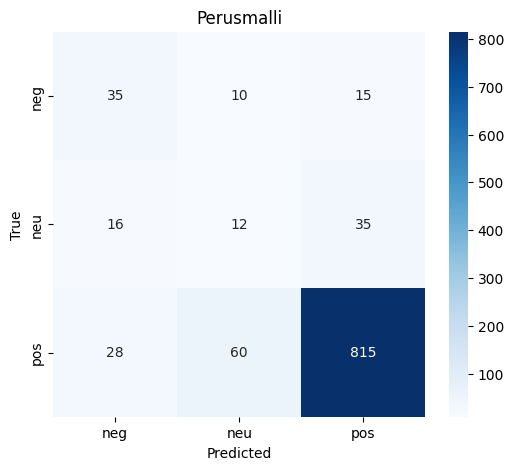


=== GridSearchCV (scoring=f1_macro) ===
Aloitetaan hyperparametrien viritys...
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Parhaat parametrit: {'clf__C': 10, 'tfidf__max_df': 0.75, 'tfidf__ngram_range': (1, 2)}
Accuracy: 0.8674463937621832
              precision    recall  f1-score   support

negatiivinen       0.47      0.45      0.46        60
   neutraali       0.17      0.11      0.13        63
positiivinen       0.92      0.95      0.94       903

    accuracy                           0.87      1026
   macro avg       0.52      0.50      0.51      1026
weighted avg       0.85      0.87      0.86      1026



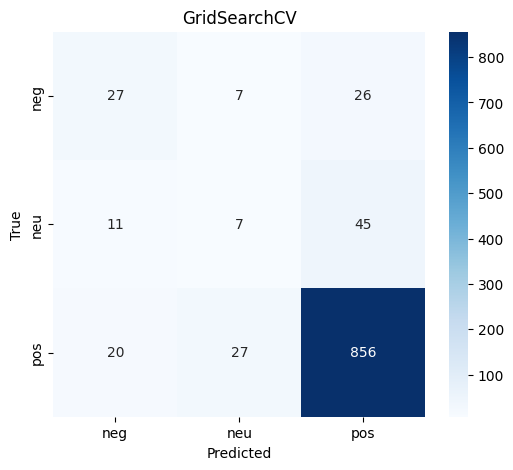


=== Oversampling (RandomOverSampler) ===
Accuracy: 0.8635477582846004
              precision    recall  f1-score   support

negatiivinen       0.52      0.50      0.51        60
   neutraali       0.16      0.13      0.14        63
positiivinen       0.92      0.94      0.93       903

    accuracy                           0.86      1026
   macro avg       0.53      0.52      0.53      1026
weighted avg       0.85      0.86      0.86      1026



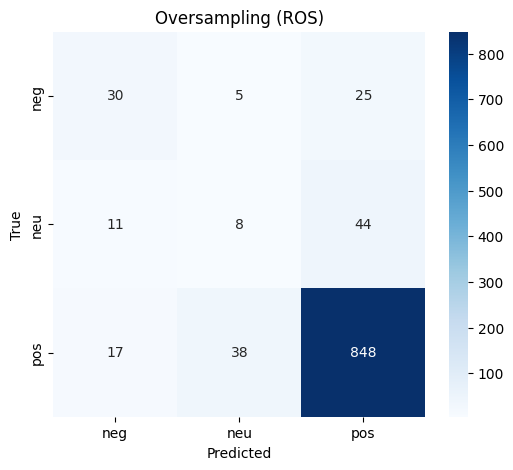


=== Undersampling (RandomUnderSampler) ===
Accuracy: 0.6549707602339181
              precision    recall  f1-score   support

negatiivinen       0.25      0.72      0.37        60
   neutraali       0.12      0.44      0.19        63
positiivinen       0.97      0.67      0.79       903

    accuracy                           0.65      1026
   macro avg       0.45      0.61      0.45      1026
weighted avg       0.87      0.65      0.73      1026



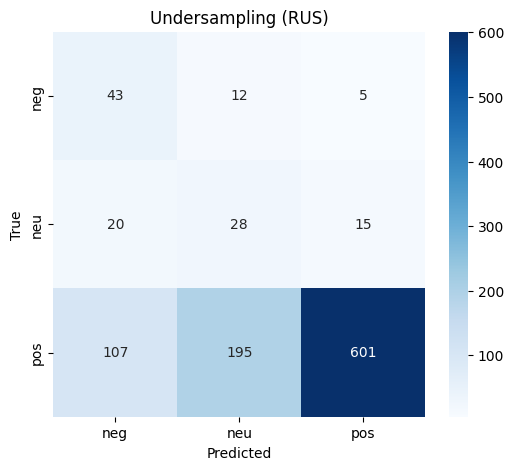


=== Päätösrajat (predict_proba) — esimerkki ===
Accuracy: 0.8567251461988304
              precision    recall  f1-score   support

negatiivinen       0.45      0.57      0.50        60
   neutraali       0.16      0.13      0.14        63
positiivinen       0.93      0.93      0.93       903

    accuracy                           0.86      1026
   macro avg       0.51      0.54      0.52      1026
weighted avg       0.86      0.86      0.86      1026



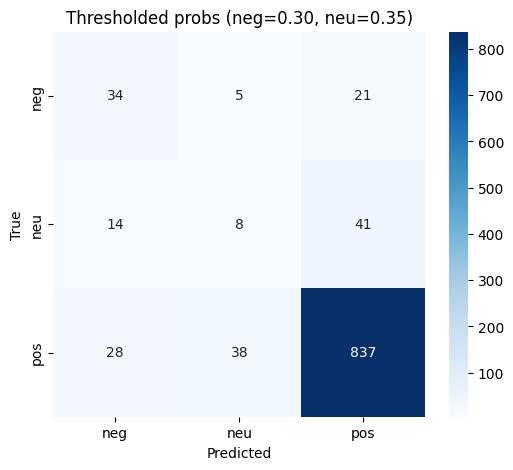

Löytyi 136 virheellistä luokittelua.
Tässä 10 ensimmäistä esimerkkiä:
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                    teksti  \
2941                                                                                                                                                                                                                                                                                                                

In [33]:
import pandas as pd
import stanza
import requests
from bs4 import BeautifulSoup
import time

#Stanza pipeline suomen kieltä varten
nlp = stanza.Pipeline('fi', processors='tokenize,pos,lemma', use_gpu=False)

#Suomenkielisten stop-sanojen lista
url = "https://raw.githubusercontent.com/stopwords-iso/stopwords-fi/master/stopwords-fi.txt"
response = requests.get(url)
#Muodostetaan stop sanoista lista, jossa jokainen sana on oma alkionsa
finnish_stop_words = response.text.splitlines()
suodatus = {'ei', 'eikä', 'mutta', 'vaan', 'vaikka', 'jos', 'kuin'} #näitä ei poisteta
custom_stop_words = [word for word in finnish_stop_words if word not in suodatus]
custom_stop_words.append('placeholder') #tyhjien otsikoiden tilalle laitettu teksti
print(f"Alkuperäinen stop-sanojen määrä: {len(finnish_stop_words)}")
print(f"Karsittu stop-sanojen määrä: {len(custom_stop_words)}")
print("Esimerkkejä:", custom_stop_words[10:20])

#Funktio tekstin lemmatisointia varten
#def lemmatize_text(text):
#    doc = nlp(text)
#    lemmatized_words = [word.lemma for sent in doc.sentences for word in sent.words]
#    return ' '.join(lemmatized_words)

# Aineisto
df = pd.read_csv('tahtiarvot.csv', delimiter=',', quoting=0)
print(df.head())
#Lemmatisoinnin sovellus
# Syöte X, data jonka avulla malli oppii. Kohde y, se mitä mallin tulee oppia ennustamaan.
#df['lemmatized_text'] = df['teksti'].apply(lemmatize_text)
#df['lemmatized_title'] = df['otsikko'].apply(lemmatize_text)
#X = df['lemmatized_title'] + df['lemmatized_text']
X = df['otsikko'] + " " + df['teksti']
y = df['tahtien_tunne']

# train_test_split sekoittaa datan ja jakaa sen neljään osaan: X_train ja y_train opetusdata, X_test ja y_test testidata
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=77, stratify=y
)

# Tarvittavat kirjastot
from sklearn.pipeline import Pipeline #ketjuttaa datan muokkausvaiheet ja malli yhteen pakettiin
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.linear_model import LogisticRegression 
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
import numpy as np
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.preprocessing import FunctionTransformer
import matplotlib.pyplot as plt
import seaborn as sns

def plot_conf_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred, labels=["negatiivinen","neutraali","positiivinen"])
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=["neg","neu","pos"],
                yticklabels=["neg","neu","pos"])
    plt.title(title)
    plt.ylabel("True")
    plt.xlabel("Predicted")
    plt.show()

# -----------------------------
# 1. Perusmalli
# -----------------------------
print("\n=== Perusmalli (baseline) ===")
text_clf = Pipeline([
    ('tfidf', TfidfVectorizer(stop_words=custom_stop_words)), #vastaanottaa tekstin ja muuttaa sen numeroiksi TF-IDF:n avulla
    ('clf', LogisticRegression(class_weight='balanced', max_iter=1000)), #Luokittelija, ottaa vastaan TfidVectorizer:n tuottaman numerodatan ja tekee ennusteita sen perusteella. 
    #('clf', MultinomialNB()),
    #('clf', LinearSVC(class_weight='balanced', dual="auto")),
])
text_clf.fit(X_train, y_train) #.fit() komento syöttää opetusdatan X_train ja y_train putken läpi, TfidVectorizer analysoi X_trainin sanat ja luo sanaston sekä laskee TF-IDF arvot.
predictions = text_clf.predict(X_test) #Ennusteet testidatalla
#Tulostetaan raportti
print(f"Accuracy: {accuracy_score(y_test, predictions)}")
print(classification_report(y_test, predictions))
plot_conf_matrix(y_test, predictions, "Perusmalli")

# -----------------------------
# 2. GridSearchCV-optimoitu malli
# -----------------------------
print("\n=== GridSearchCV (scoring=f1_macro) ===")
parameters = {
    'tfidf__ngram_range': [(1, 1), (1, 2)],  # Kokeile yksittäisiä sanoja vs. sanapareja
    'tfidf__max_df': [0.75, 1.0],           # Jätä huomiotta sanat, jotka esiintyvät > 75% dokumenteista
    'clf__C': [0.1, 1, 10],                 # LogisticRegression-mallin säännöllistämisvoimakkuus
}
grid_search = GridSearchCV(text_clf, parameters, cv=5, n_jobs=-1, verbose=1, scoring="f1_macro")
print("Aloitetaan hyperparametrien viritys...")
grid_search.fit(X_train, y_train) # Käytä AINA vain opetusdataa viritykseen!
print("Parhaat parametrit:", grid_search.best_params_)
best_model = grid_search.best_estimator_
predictions = best_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, predictions))
print(classification_report(y_test, predictions))
plot_conf_matrix(y_test, predictions, "GridSearchCV")

# -----------------------------
# 3. Oversampling-malli
# -----------------------------
to2d = FunctionTransformer(lambda X: np.array(X).reshape(-1, 1), validate=False)
to1d = FunctionTransformer(lambda X: np.array(X).ravel(), validate=False)

print("\n=== Oversampling (RandomOverSampler) ===")
text_clf_balanced = ImbPipeline([
    ('to2d', to2d),                                   # 1D -> 2D
    ('ros', RandomOverSampler(random_state=77)),      # oversampling
    ('to1d', to1d),                                   # 2D -> 1D takaisin
    ('tfidf', TfidfVectorizer(stop_words=custom_stop_words)),
    ('clf', LogisticRegression(class_weight='balanced', max_iter=1000)),
])
text_clf_balanced.fit(X_train, y_train)
pred_overs = text_clf_balanced.predict(X_test)
print("Accuracy:", accuracy_score(y_test, pred_overs))
print(classification_report(y_test, pred_overs))
plot_conf_matrix(y_test, pred_overs, "Oversampling (ROS)")

# -----------------------------
# 4. Undersampling-malli
# -----------------------------
print("\n=== Undersampling (RandomUnderSampler) ===")
text_clf_under = ImbPipeline([
    ('to2d', to2d),
    ('rus', RandomUnderSampler(random_state=77)),
    ('to1d', to1d),
    ('tfidf', TfidfVectorizer(stop_words=custom_stop_words)),
    ('clf', LogisticRegression(class_weight='balanced', max_iter=1000)),
])

text_clf_under.fit(X_train, y_train)
pred_under = text_clf_under.predict(X_test)
print("Accuracy:", accuracy_score(y_test, pred_under))
print(classification_report(y_test, pred_under))
plot_conf_matrix(y_test, pred_under, "Undersampling (RUS)")

# -----------------------------
# 5. Päätösrajojen säätö
# -----------------------------
def predict_with_thresholds(proba, classes, thresholds):
    idx = {c:i for i,c in enumerate(classes)}
    preds = []
    for p in proba:
        # Valitaan ensin harvinaiset luokat jos ylittävät kynnyksen
        if p[idx['negatiivinen']] >= thresholds['negatiivinen']:
            preds.append('negatiivinen')
        elif p[idx['neutraali']] >= thresholds['neutraali']:
            preds.append('neutraali')
        else:
            preds.append('positiivinen')
    return np.array(preds)

print("\n=== Päätösrajat (predict_proba) — esimerkki ===")
# Käytä esim. GridSearch-mallia tai perusmallia – mikä tahansa LogisticRegression-pipeline käy
proba = best_model.predict_proba(X_test)
classes = best_model.named_steps['clf'].classes_

# Kokeile kynnyksiä (voit säätää/risti-validoida näitä)
thresholds = {'negatiivinen': 0.30, 'neutraali': 0.35}
pred_thresh = predict_with_thresholds(proba, classes, thresholds)

print("Accuracy:", accuracy_score(y_test, pred_thresh))
print(classification_report(y_test, pred_thresh))
plot_conf_matrix(y_test, pred_thresh, "Thresholded probs (neg=0.30, neu=0.35)")

# -----------------------------
# 6. Virhemetsästys
# -----------------------------
error_df = pd.DataFrame({
    'teksti': X_test,           # Käytä tässä alkuperäistä, luettavaa tekstiä
    'oikea_tunne': y_test,
    'ennustettu_tunne': predictions
})

# Etsitään ne rivit, joissa ennuste ja totuus eivät täsmää
misclassified_reviews = error_df[error_df['oikea_tunne'] != error_df['ennustettu_tunne']]

# Tulostetaan esimerkiksi 10 ensimmäistä virhettä
print(f"Löytyi {len(misclassified_reviews)} virheellistä luokittelua.")
print("Tässä 10 ensimmäistä esimerkkiä:")

# Asetus, jotta pitkät tekstit näkyvät kokonaan eikä niitä katkaista
pd.set_option('display.max_colwidth', None)

# Tulosta 10 ensimmäistä virhettä
print(misclassified_reviews.head(10))
